In [ ]:
import pandas as pd
import numpy as np
import os
import random

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
os.chdir("/Users/yj.noh/Documents/GitHub")
print(os.getcwd())
plt.rcParams['font.family'] = 'AppleGothic'

In [ ]:
# df = pd.read_csv("/Users/yj.noh/Desktop/app_push_data.csv", encoding = "utf-8")
# print(df.head(2))
# print(df.isna().sum())

In [ ]:
# rr = pd.read_csv("/Users/yj.noh/Desktop/risk_ratio.csv", encoding = "utf-8")
# print(rr.head(2))

In [ ]:
# df = pd.merge(df,rr[['brms_rider_id', 'is_churn', 'cluster', 'risk_ratio']], left_on = ["mem_no"], right_on = ["brms_rider_id"], how="left")
# df.drop(['brms_rider_id'], axis = 1, inplace=True)
# print(df.head(2))

In [ ]:
# df['first_dlvry'] = df['first_dlvry'].fillna(0)
# df['first_logon'] = df['first_logon'].fillna(0)
# print(df.head(2))

In [ ]:
# df['first_dlvry'] = pd.to_datetime(df['first_dlvry'], format = '%Y-%m-%d %H:%M', errors = 'ignore')
# df['first_logon'] = pd.to_datetime(df['first_logon'], format = '%Y-%m-%d %H:%M', errors = 'ignore')
# print(df.head(2))

In [ ]:
# df_target['is_logon'] = df.apply(lambda row: 1 if row['first_dlvry'] >= pd.Timestamp('2023-11-24 10:30') else 0, axis=1)
# df_target['is_dlvry'] = df.apply(lambda row: 1 if row['first_dlvry'] >= pd.Timestamp('2023-11-24 10:30') else 0, axis=1)


In [4]:
df = pd.read_csv("/Users/yj.noh/Documents/GitHub/app_push_filtered.csv", encoding = "utf-8")
print(df.head(2))
print(df.isna().sum())

   Unnamed: 0                                             mem_no crm_group  \
0           1  4B81D6AC389F3B3EC2C4F9B7C8F6777345DEBFF9FA5BE5...   control   
1           2  5478B68F16B59793F918F286F5C622A556E0FDF342FE16...   control   

         time          first_logon          first_dlvry  ord_cnt    cluster  \
0  2023-11-24                  NaN                  NaN        0   part_all   
1  2023-11-24  2023-11-24 19:55:00  2023-11-24 20:05:00        2  part_peak   

  is_churn  risk_ratio  is_logon  is_dlvry  
0       NO    4.238532         0         0  
1       NO    2.270270         1         1  
Unnamed: 0         0
mem_no             0
crm_group          0
time               0
first_logon    14622
first_dlvry    16265
ord_cnt            0
cluster            0
is_churn           0
risk_ratio         0
is_logon           0
is_dlvry           0
dtype: int64


In [7]:
def plot_numeric (data, numeric_vars, outcome):
    
    palette = 'coolwarm'
    
    for num_var in numeric_vars:
        fig, axs = plt.subplots(1,3, figsize=(12,4))
        fig.suptitle(f'{num_var}', fontsize = 12)
    
        # Boxplot
        sns.boxplot(ax=axs[0], x= outcome, y=num_var, data= data, palette = palette)
        axs[0].set_title('Boxplot')
    
        # Violinplot
        sns.violinplot(ax=axs[1], x = outcome, y = num_var, data = data, palette = palette)
        axs[1].set_title('Violinplot')
        
        # KDE plot
        sns.kdeplot(ax=axs[2], data = data, x = num_var, hue = outcome, fill = True, common_norm = False, palette = palette, alpha=.5, linewidth=0)
        axs[2].set_title('Density plot')
        
        plt.tight_layout()
        fig.subplots_adjust(top=0.8) # title 공간 확보
        
        plt.show()
        plt.close(fig)

In [8]:
def plot_category(data, category_vars, outcome) : 

    palette = 'coolwarm'
        
    for cat_var in category_vars : 
        plt.figure(figsize = (12,4))
        ax = sns.countplot(x=cat_var, hue=outcome, data=data, palette=palette)
        plt.title(f'{cat_var}')
        plt.ylabel('개수')
        plt.legend(title=outcome, loc='upper right')
        plt.xticks(fontsize=8)  # x축 글씨 조정
        
        # 각 막대에 데이터 레이블 추가
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',  # 높이 값(즉, 개수)을 얻어 텍스트로 설정
                        (p.get_x() + p.get_width() / 2., p.get_height()),  # 텍스트 위치 설정
                        ha='center',  # 가로 정렬(center)
                        va='center',  # 세로 정렬(center)
                        xytext=(0, 10),  # 텍스트 오프셋(위쪽으로 약간 이동)
                        textcoords='offset points',  # 어떤 종류의 오프셋을 사용할지 정의
                        fontsize=10)  # 글꼴 크기
        
        
        plt.tight_layout()
        plt.show()

In [6]:
df['is_dlvry'] = df['is_dlvry'].astype(object)
df['is_logon'] = df['is_logon'].astype(object)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   17568 non-null  int64  
 1   mem_no       17568 non-null  object 
 2   crm_group    17568 non-null  object 
 3   time         17568 non-null  object 
 4   first_logon  2946 non-null   object 
 5   first_dlvry  1303 non-null   object 
 6   ord_cnt      17568 non-null  int64  
 7   cluster      17568 non-null  object 
 8   is_churn     17568 non-null  object 
 9   risk_ratio   17568 non-null  float64
 10  is_logon     17568 non-null  object 
 11  is_dlvry     17568 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.6+ MB
None


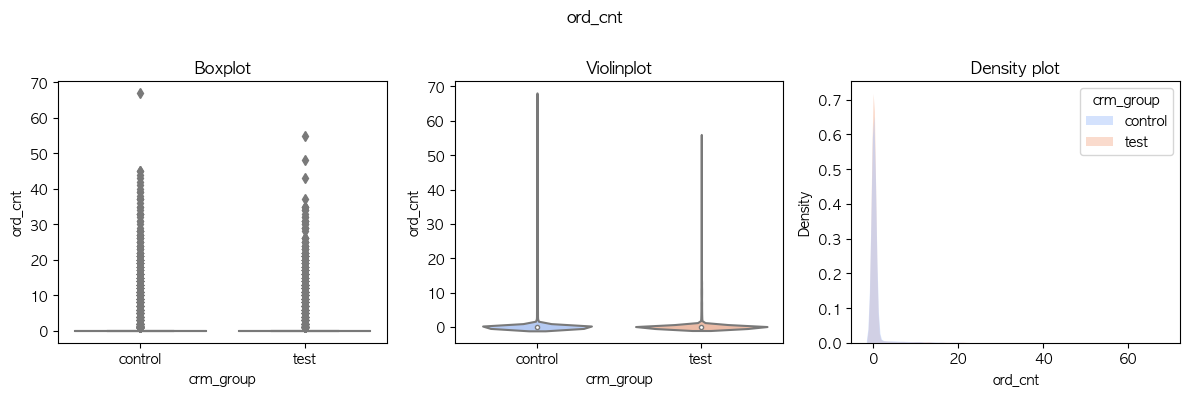

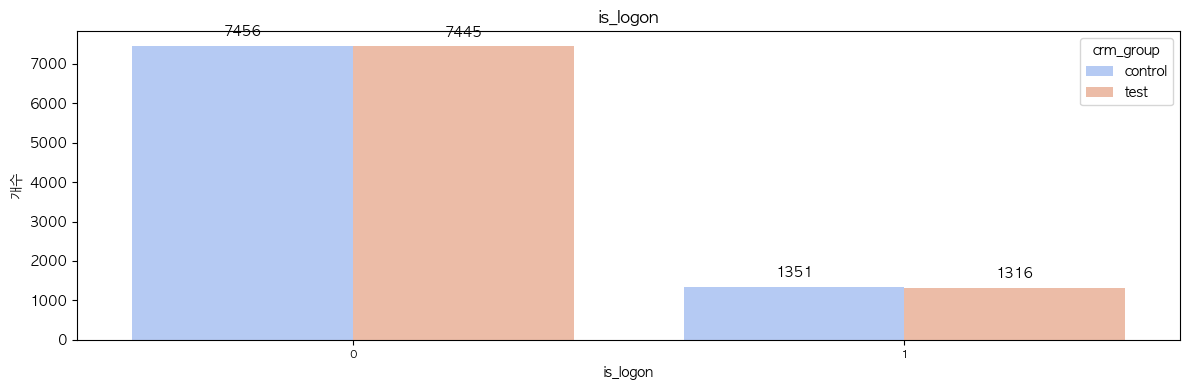

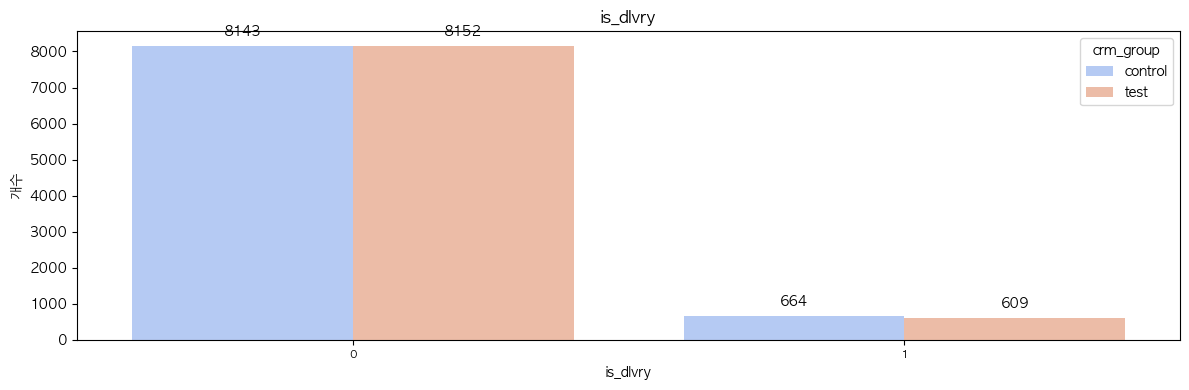

In [9]:
num_vars = ['ord_cnt']
category_vars = ['is_logon', 'is_dlvry']

plot_numeric(df, num_vars, 'crm_group')
plot_category(df, category_vars, 'crm_group')